In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder


%matplotlib inline



pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

In [9]:
train = pd.read_csv("mertrain.csv")
test = pd.read_csv("mertest.csv")

In [10]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [11]:
y = train['y'].values
y_mean = np.mean(y)
id_test = test['ID'].values
X = train.drop(['y','ID'], axis=1).values
X_test= test.drop(['ID'], axis=1).values

In [12]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

5

In [13]:
for train_index, test_index in kf.split(X):
    X_train, y_train=X[train_index], y[train_index]
    X_valid, y_valid=X[test_index], y[test_index]

In [32]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(X, y, feature_names=train.drop(['y','ID'], axis=1).columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, maximize=True)



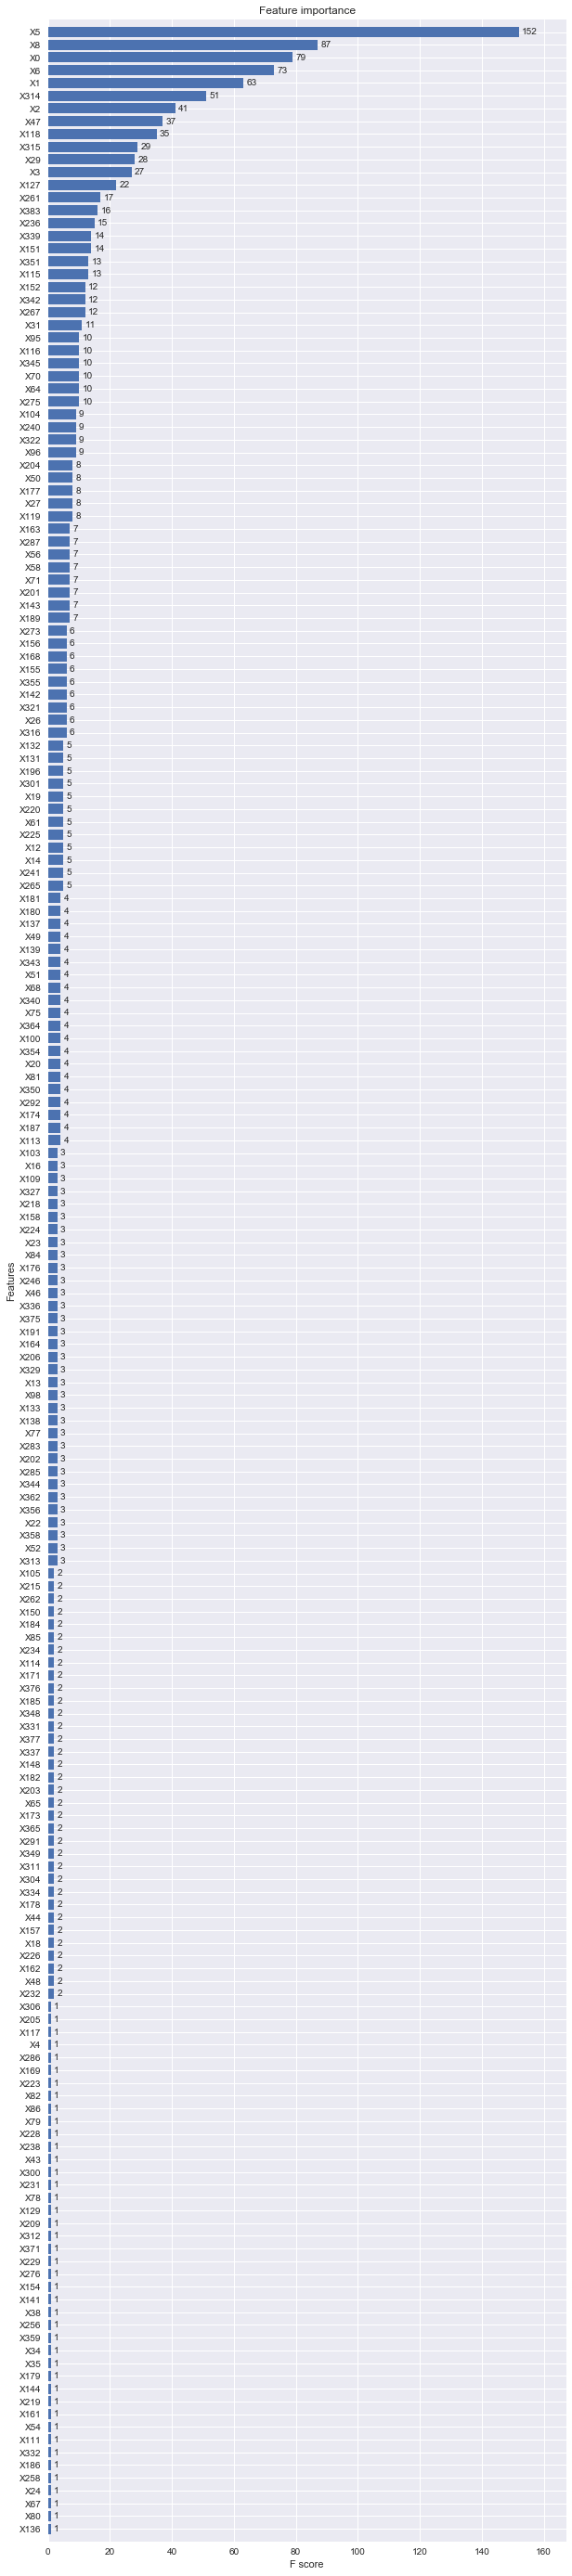

In [33]:
# plot the important features #
fig, ax = plt.subplots(figsize=(10,50))
xgb.plot_importance(model, height=0.8, ax=ax )
plt.show()

In [21]:
series=pd.Series([1,2,3,4],index=["a","b","c","d"])

In [22]:
series.unique

<bound method Series.unique of a    1
b    2
c    3
d    4
dtype: int64>